### **Logistic regression visualization**



### 1. **Loss surface**

We had visualized logistic regression loss function in the slides.
Here is the step by step process to generate this visualization:

1. Generate a grid of weights $=w_1 \text { and } w_2$ 

2. For each point on the grid, calculate cross entropy on the fix training set.

3. Plot contour of weights and loss.

The basic idea here is to calculate loss for a given weight vector on a fixed estimator and training set.

In [1]:
from matplotlib import cm 
from matplotlib.colors import colorConverter, ListedColormap

We need to instantiate a logistic regression estimator for cross entropy calculation.

In [2]:
import numpy as np

def create_toy_data():
    x0 = np.random.normal(size=50).reshape(-1,2)-1
    x1 = np.random.normal(size=50).reshape(-1,2)+1
    
    return np.concatenate([x0,x1]),np.concatenate([np.zeros(x1.shape[0]),np.ones(x1.shape[0])]).astype(int) 

In [3]:
import itertools
import functools

def polynomial_transform(x, degree):
    if x.ndim == 1:
        x = x[:, None]
    x_t = x.transpose()
    features = [np.ones(len(x))]

    for degree in range(1, degree+1):
        for items in itertools.combinations_with_replacement(x_t, degree):
            features.append(functools.reduce(lambda x, y: x*y, items))
    return np.asarray(features).transpose()

In [4]:
class LogisticRegression(object):
  #y_hat = sigmoid(X@w)

  def set_weight_vector(self,w):
    self.w = w 

  def linear_combination(self,X):
    #z=x@w 
    return X@self.w 

  def sigmoid(self,z):
    return 1/(1+np.exp(-z)) 

  def activation(self,X):
    #act = sigmoid(Xw)
    return self.sigmoid(self.linear_combination(X))

  def predict(self,X, threshold:float=0.5):
    return (self.activation(X)>threshold).astype(int)

  def loss(self,X,y,reg_rate:float):
    predicted_prob = self.activation(X) 
    return (-1*(np.sum(y*np.log(predicted_prob)+(1-y)*np.log(1-predicted_prob)))) + reg_rate*np.dot(np.transpose(self.w),self.w)
  
  def calculate_gradient(self,X,y,reg_rate):
    return X.T@(self.activation(X)-y) + reg_rate*self.w 

  def update_weights(self,grad,lr):
    return self.w -lr*grad

  def gd(self,X,y, num_epochs,lr, reg_rate):
    self.w = np.zeros(X.shape[1])
    self.w_all=[] 
    self.err_all=[]
    for i in np.arange(0,num_epochs):
      dJdW = self.calculate_gradient(X,y,reg_rate) #grad=djdw 
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y,reg_rate))
      self.w = self.update_weights(dJdW,lr)
    return self.w

In [5]:
log_reg_visualization = LogisticRegression()

We also need training data for calculation of loss for a given weight vector.

In [6]:
from sklearn.model_selection import train_test_split

feature_matrix, label_vector = create_toy_data() 
feature_matrix_bias = polynomial_transform(feature_matrix, degree=1)

x_train, x_test, y_train, y_test = train_test_split(feature_matrix_bias,label_vector)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37, 3), (13, 3), (37,), (13,))

Next we generate a grid of 25 weights.

In [8]:
point_count = 25

w1 = np.linspace(-5,5, num=point_count)
w2 = np.linspace(-5,5, num=point_count)

w1_list, w2_list = np.meshgrid(w1,w2)

Calculate loss at each point on the grid.

In [9]:
# initialize loss matrix
loss = np.zeros((point_count, point_count)) 

# fill the loss matrix for each combination of weights

for i in range(point_count):
    for j in range(point_count):
        weight_vector = np.array([0,w1_list[i,j], w2_list[i,j]])

        log_reg_visualization.set_weight_vector(weight_vector)
        loss[i,j] = log_reg_visualization.loss(x_train, y_train, reg_rate=0)

Now plot the loss surface.

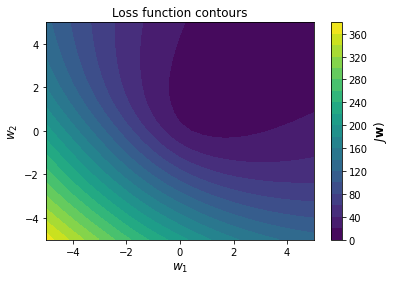

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.contourf(w1_list, w2_list, loss, 20, cmap=cm.viridis)

cbar = plt.colorbar()
cbar.ax.set_ylabel('$J\mathbf{w})$', fontsize=12)

plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Loss function contours')
plt.show()

### 2. **Gradient descent trajectory**

In [11]:
log_reg_visualization.gd(x_train, y_train, num_epochs=1000, reg_rate=0,lr=1e-2)

array([0.77181357, 3.75284553, 4.56612429])

Here we make use of weights stored during the gradient descent procedure.

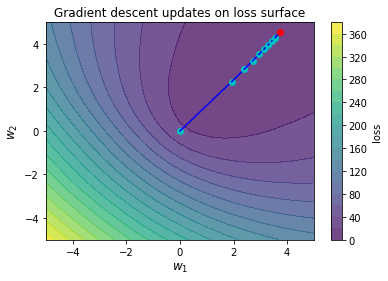

In [12]:
import matplotlib.pyplot as plt

#First plot the loss contours based on the grid in the previous subsection.
plt.figure(figsize=(6, 4))
plt.contourf(w1_list, w2_list, loss, 20, alpha=0.75, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

# plot weights after each few epochs
for i in range(1, 900, 100):
    w1 = log_reg_visualization.w_all[i-1]
    w2 = log_reg_visualization.w_all[i+100]

    #plt the weight loss values that represents the update
    plt.plot(w1[1], w1[2], marker='o', color='c')  # Plot the weight-loss value.
    plt.plot([w1[1], w2[1]], [w1[2], w2[2]], linestyle='-', color='b')

#plot the last weight
w1 = log_reg_visualization.w_all[-1]
plt.plot(w1[1], w1[2], marker='o', color='r')

#show figure

plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title("Gradient descent updates on loss surface")
plt.show()
